In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import iminuit
import probfit

In [2]:

# Let's make a straight line with gaussian(mu=0, sigma=1) noise
np.random.seed(0)
x = np.linspace(0, 10, 20) 
y = 3 * x + 15 + np.random.randn(len(x))
err = np.ones(len(x))
plt.errorbar(x, y, err, fmt='.');



<IPython.core.display.Javascript object>

In [3]:
# Let's define our line.
# First argument has to be the independent variable,
# arguments after that are shape parameters.
def line(x, m, c): # define it to be parabolic or whatever you like
    return m * x + c

In [4]:
iminuit.describe(line)

['x', 'm', 'c']

In [5]:
# Define a chi^2 cost function
chi2 = probfit.Chi2Regression(line, x, y)

# Chi2Regression is just a callable object; nothing special about it
iminuit.describe(chi2)

['m', 'c']

In [6]:
# minimize it
# yes, it gives you a heads up that you didn't give it initial value
# we can ignore it for now
minuit = iminuit.Minuit(chi2,m=1) 
minuit.migrad();

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: InitialParamWarning: Parameter m is floating but does not have initial step size. Assume 1.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: InitialParamWarning: Parameter c does not have initial value. Assume 0.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: InitialParamWarning: Parameter c is floating but does not have initial step size. Assume 1.


FCN = 12.0738531135 
 TOTAL NCALL = 36 
 NCALLS = 36 
 
 
 EDM = 2.74631258153e-21 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 m 
 2.88628 
 0.0736788 
 0 
 0 
 
 
 
 
 
 
 2 
 c 
 16.1379 
 0.430946 
 0 
 0 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & m & 2.886e+00 & 7.368e-02 & & & & & \\
\hline
2 & c & 1.614e+01 & 4.309e-01 & & & & & \\
\hline
\end{tabular}

In [7]:


# The output above is a pretty-printed summary of the fit results from
# minuit.print_fmin()
# which was automatically called by iminuit.Minuit.migrad() after running MIGRAD.

# Let's see our results as Python dictionaries ...
print(minuit.values)
print(minuit.errors)



{'c': 16.137947520531796, 'm': 2.886277414481922}
{'c': 0.4309458033945974, 'm': 0.07367883984615219}


In [8]:
chi2.draw(minuit)

((array([  0.        ,   0.52631579,   1.05263158,   1.57894737,
           2.10526316,   2.63157895,   3.15789474,   3.68421053,
           4.21052632,   4.73684211,   5.26315789,   5.78947368,
           6.31578947,   6.84210526,   7.36842105,   7.89473684,
           8.42105263,   8.94736842,   9.47368421,  10.        ]),
  array([ 16.76405235,  16.97910458,  19.13663272,  21.9777353 ,
          23.18334746,  21.91745896,  25.42377263,  25.90127437,
          27.5283601 ,  29.62112482,  30.93351726,  33.82269456,
          34.70840615,  35.64799081,  37.54912639,  39.01788485,
          41.75723697,  41.636947  ,  43.73412033,  44.14590426])),
 None,
 (array([  0.        ,   0.52631579,   1.05263158,   1.57894737,
           2.10526316,   2.63157895,   3.15789474,   3.68421053,
           4.21052632,   4.73684211,   5.26315789,   5.78947368,
           6.31578947,   6.84210526,   7.36842105,   7.89473684,
           8.42105263,   8.94736842,   9.47368421,  10.        ]),
  array([ 1

In [9]:
minuit.values

{'c': 16.137947520531796, 'm': 2.886277414481922}

In [10]:


# First let's make some example data
np.random.seed(0)
data = np.random.randn(10000) * 4 + 1
# sigma = 4 and mean = 1
fig, ax = plt.subplots()
ax.hist(data, bins=100, histtype='step');


<IPython.core.display.Javascript object>

In [11]:


# Define your PDF / model
def gauss_pdf(x, mu, sigma):
    """Normalized Gaussian"""
    return 1 / np.sqrt(2 * np.pi) / sigma * np.exp(-(x - mu) ** 2 / 2. / sigma ** 2)



In [12]:
# Build your cost function
# Here we use binned likelihood
binned_likelihood = probfit.BinnedLH(gauss_pdf, data)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: InitialParamWarning: Parameter mu does not have initial value. Assume 0.
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: InitialParamWarning: Parameter mu is floating but does not have initial step size. Assume 1.
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: InitialParamWarning: Parameter sigma is floating but does not have initial step size. Assume 1.
  app.launch_new_instance()


<IPython.core.display.Javascript object>


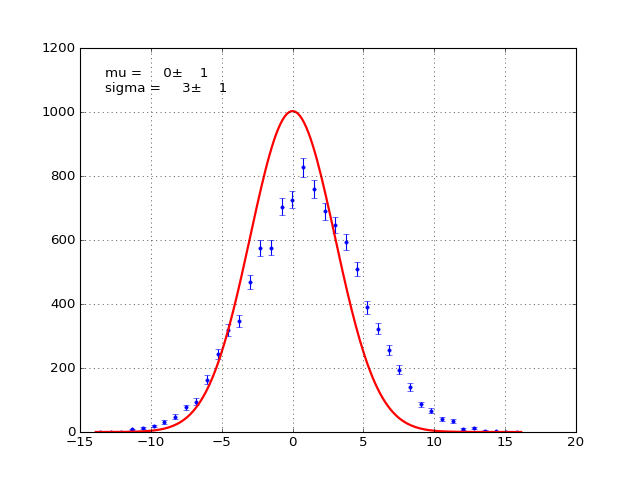

In [13]:
# Create the minuit
# and give an initial value for the sigma parameter
minuit = iminuit.Minuit(binned_likelihood, sigma=3)
# Remember: minuit.errordef is automatically set to 0.5
# as required for likelihood fits (this was explained above)
fig, ax = plt.subplots()
binned_likelihood.draw(minuit);


In [31]:
minuit.migrad()
# Like in all binned fit with long zero tail. It will have to do something about the zero bin
# probfit.BinnedLH does handle them gracefully but will give you a warning;

({'hesse_failed': False, 'has_reached_call_limit': False, 'has_accurate_covar': True, 'has_posdef_covar': True, 'up': 0.5, 'edm': 2.3106419863778478e-12, 'is_valid': True, 'is_above_max_edm': False, 'has_covariance': True, 'has_made_posdef_covar': False, 'has_valid_parameters': True, 'fval': 27927.113947063142, 'nfcn': 11},
 [{'is_const': False, 'name': 'mu', 'has_limits': False, 'value': 0.9262650399105372, 'number': 0, 'has_lower_limit': False, 'upper_limit': 0.0, 'lower_limit': 0.0, 'has_upper_limit': False, 'error': 0.03951279774701484, 'is_fixed': False},
  {'is_const': False, 'name': 'sigma', 'has_limits': False, 'value': 3.9502284860056496, 'number': 1, 'has_lower_limit': False, 'upper_limit': 0.0, 'lower_limit': 0.0, 'has_upper_limit': False, 'error': 0.027934270694710005, 'is_fixed': False}])

<IPython.core.display.Javascript object>


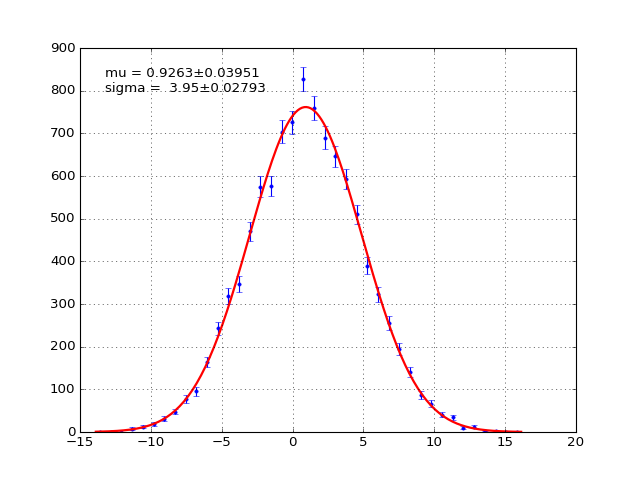

((array([-13.96040255, -13.20622647, -12.45205038, -11.6978743 ,
         -10.94369821, -10.18952213,  -9.43534604,  -8.68116995,
          -7.92699387,  -7.17281778,  -6.4186417 ,  -5.66446561,
          -4.91028953,  -4.15611344,  -3.40193736,  -2.64776127,
          -1.89358519,  -1.1394091 ,  -0.38523302,   0.36894307,
           1.12311915,   1.87729524,   2.63147132,   3.38564741,
           4.1398235 ,   4.89399958,   5.64817567,   6.40235175,
           7.15652784,   7.91070392,   8.66488001,   9.41905609,
          10.17323218,  10.92740826,  11.68158435,  12.43576043,
          13.18993652,  13.9441126 ,  14.69828869,  15.45246477,  16.20664086]),
  array([   1.,    1.,    0.,    8.,   12.,   19.,   31.,   48.,   77.,
           95.,  164.,  243.,  319.,  346.,  470.,  575.,  576.,  704.,
          726.,  827.,  759.,  690.,  646.,  593.,  510.,  390.,  323.,
          256.,  194.,  141.,   86.,   66.,   41.,   34.,   10.,   12.,
            3.,    2.,    1.,    1.])),
 (arra

In [32]:
fig, ax = plt.subplots()
binned_likelihood.draw(minuit)

In [16]:
print ('Value: {}'.format(minuit.values))
print ('Error: {}'.format(minuit.errors))


Value: {'mu': 0.9258754454754967, 'sigma': 3.952381323607855}
Error: {'mu': 0.03962599040295913, 'sigma': 0.02826740732189662}


# Chi^2 fit of Gaussian

In [1]:


# We will use the same data as in the previous example
np.random.seed(0)
data = np.random.randn(10000) * 4 + 1
# sigma = 4 and mean = 1
plt.hist(data, bins=100, histtype='step');



NameError: name 'np' is not defined

In [18]:
# Binned chi^2 fit only makes sense (for now) for extended PDFs
# probfit.Extended adds a norm parameter with name 'N'
extended_gauss_pdf = probfit.Extended(gauss_pdf)

In [19]:


# Describe the function signature
iminuit.describe(extended_gauss_pdf)



['x', 'mu', 'sigma', 'N']

In [20]:
# Chi^2 distribution fit is really bad for distribution with long tail
# since when bin count=0... poisson error=0 and blows up chi^2
# so give it some range
chi2 = probfit.BinnedChi2(extended_gauss_pdf, data, bound=(-7,10))
# This time we use the pedantic=False option to tell Minuit
# that we don't want warnings about parameters without initial
# value or step size.
# And print_level=0 means that no output is generated
minuit = iminuit.Minuit(chi2, sigma=1, pedantic=False, print_level=0)
minuit.migrad();


In [21]:


# Now let's look at the results
minuit.print_fmin()
minuit.print_matrix()
chi2.draw(minuit);



FCN = 36.5025998638 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 4.6474267658e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 mu 
 0.906468 
 0.0448253 
 0 
 0 
 
 
 
 
 
 
 2 
 sigma 
 3.95905 
 0.0411286 
 0 
 0 
 
 
 
 
 
 
 3 
 N 
 9969.72 
 103.372 
 0 
 0 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $\mu$ & 9.065e-01 & 4.483e-02 & & & & & \\
\hline
2 & $\sigma$ & 3.959e+00 & 4.113e-02 & & & & & \\
\hline
3 & N & 9.970e+03 & 1.034e+02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 mu
 
 
 
 
 
 
 
 sigma
 
 
 
 
 
 
 
 N
 
 
 
 
 
 
 
 mu 
 
 
 1.00
 
 
 
 -0.10
 
 
 
 -0.05
 
 
 
 
 
 sigma 
 
 
 -0.10
 
 
 
 1.00
 
 
 
 0.18
 
 
 
 
 
 N 
 
 
 -0.05
 
 
 
 0.18
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$\mu$} & \rotatebox{90}{$\sigma$} & \rotatebox{90}{N}\\
\hline
$\mu$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{167,247,183} -0.05\\
\hline
$\sigma$ & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} 0.18\\
\hline
N & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

# Fast unbinned likelihood fit Cython

In [22]:


# We will use the same data as in the previous example
np.random.seed(0)
data = np.random.randn(10000) * 4 + 1
# sigma = 4 and mean = 1
plt.hist(data, bins=100, histtype='step');



In [23]:
# We want to speed things up with Cython
%load_ext Cython

In [24]:


%%cython
# Same gaussian distribution but now written in Cython
# The %%cython IPython does the following:
# * Call Cython to generate C code for a Python C extension.
# * Compile it into a Python C extension (a shared library)
# * Load it into the current namespace
# If you don't understand these things, don't worry, it basically means:
# * Get full-metal speed easily
cimport cython
from libc.math cimport exp, M_PI, sqrt
@cython.binding(True) # IMPORTANT: this tells Cython to dump the function signature
def gauss_pdf_cython(double x, double mu, double sigma):
    return 1 / sqrt(2 * M_PI) / sigma * exp(-(x - mu) ** 2 / 2. / sigma ** 2)



In [25]:
# Define the unbinned likelihood cost function 
unbinned_likelihood = probfit.UnbinnedLH(gauss_pdf_cython, data)

In [26]:
minuit = iminuit.Minuit(unbinned_likelihood, sigma=2, pedantic=False, print_level=0)
# Remember: minuit.errordef is automatically set to 0.5
# as required for likelihood fits (this was explained above)
minuit.migrad() # yes: amazingly fast
unbinned_likelihood.show(minuit)
minuit.print_fmin()
minuit.print_matrix()

FCN = 27927.113951 
 TOTAL NCALL = 61 
 NCALLS = 61 
 
 
 EDM = 3.94434184481e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 mu 
 0.926222 
 0.039503 
 0 
 0 
 
 
 
 
 
 
 2 
 sigma 
 3.9503 
 0.0279336 
 0 
 0 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $\mu$ & 9.262e-01 & 3.950e-02 & & & & & \\
\hline
2 & $\sigma$ & 3.950e+00 & 2.793e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 mu
 
 
 
 
 
 
 
 sigma
 
 
 
 
 
 
 
 mu 
 
 
 1.00
 
 
 
 0.00
 
 
 
 
 
 sigma 
 
 
 0.00
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$\mu$} & \rotatebox{90}{$\sigma$}\\
\hline
$\mu$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
$\sigma$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

In [27]:


# Remember how slow draw_mnprofile() was in the last example?
# Now it's super fast (even though the unbinned
# likelihood computation is more compute-intensive).
minuit.draw_mnprofile('mu');



In [28]:
plt.figure(figsize=(13,4))
plt.subplot(121)
unbinned_likelihood.draw_residual(minuit)
plt.subplot(122)
unbinned_likelihood.draw_residual(minuit, show_errbars=True, errbar_algo='sumw2', norm=True)


<IPython.core.display.Javascript object>

In [29]:
from __future__ import print_function
import iminuit
import numpy as np

print("Iminuit version",iminuit.__version__)

def generateData(N=100,order=2,err=0.1):
  x = np.arange(N)
  coefs = np.random.random(order+1)
  y = np.polyval(coefs,x)+np.random.normal(scale=err,size=N)
  return coefs,x,y,err

def func(x,pars):
  return np.polyval(pars,x)

f1 = lambda x,a0,a1: a1*x+a0
f2 = lambda x,a0,a1,a2: a2*x**2+a1*x+a0
f3 = lambda x,a0,a1,a2,a3: a3*x**3+a2*x**2+a1*x+a0

class GenericChi2:
  def __init__(self, f, x, y,e=1.):
    self.f = f
    self.x = x; self.y=y; self.e=e
    args = iminuit.describe(f)#extract function signature
    self.func_code = iminuit.Struct(
      co_varnames = args[1:],#dock off independent param
      co_argcount = len(args)-1
    )
  def __call__(self, *arg):
    f = ( self.f(self.x,*arg)-self.y )/self.e
    return np.sum(f**2)

N=100
order=2
# generate data
right_values,x,y,e = generateData(N,order)
plt.scatter(x,y)
right_values = right_values[::-1]



# get fitting function
f = globals()["f%d"%order]
pars_dict = {}
for i in range(order+1):
    pars_dict["error_a%d" % i] = 0.01
    pars_dict["a%d" % i] = 0.5
im = iminuit.Minuit( GenericChi2(f,x,y,e),errordef=1,**pars_dict )
im.migrad()
p = im.values.keys(); p.sort()
for i,pi in enumerate(p):
    print("Par %s, best fit %.4f +/- %.4f, exact value %.4f" % 
      (pi,im.values[pi],im.errors[pi],right_values[i]))


im.fitarg["fix_a0"]=True
im.fitarg["a0"]=0

print("Is a0 fixed: %s"%im.is_fixed("a0"))
im.migrad()
p = im.values.keys(); p.sort()
for i,pi in enumerate(p):
    print("Par %s, best fit %.4f +/- %.4f, exact value %.4f" % 
      (pi,im.values[pi],im.errors[pi],right_values[i]))





Iminuit version 1.2


FCN = 96.1755712416 
 TOTAL NCALL = 64 
 NCALLS = 64 
 
 
 EDM = 4.33645955308e-11 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 a0 
 0.509024 
 0.0294098 
 0 
 0 
 
 
 
 
 
 
 2 
 a1 
 0.403372 
 0.00137298 
 0 
 0 
 
 
 
 
 
 
 3 
 a2 
 0.0956476 
 1.34198e-05 
 0 
 0 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & a0 & 5.090e-01 & 2.941e-02 & & & & & \\
\hline
2 & a1 & 4.034e-01 & 1.373e-03 & & & & & \\
\hline
3 & a2 & 9.565e-02 & 1.342e-05 & & & & & \\
\hline
\end{tabular}

Par a0, best fit 0.5090 +/- 0.0294, exact value 0.5256
Par a1, best fit 0.4034 +/- 0.0014, exact value 0.4019
Par a2, best fit 0.0956 +/- 0.0000, exact value 0.0957
Is a0 fixed: False


FCN = 96.1755712416 
 TOTAL NCALL = 84 
 NCALLS = 20 
 
 
 EDM = 8.34674997114e-18 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 a0 
 0.509024 
 0.0294148 
 0 
 0 
 
 
 
 
 
 
 2 
 a1 
 0.403372 
 0.00137298 
 0 
 0 
 
 
 
 
 
 
 3 
 a2 
 0.0956476 
 1.34192e-05 
 0 
 0 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & a0 & 5.090e-01 & 2.941e-02 & & & & & \\
\hline
2 & a1 & 4.034e-01 & 1.373e-03 & & & & & \\
\hline
3 & a2 & 9.565e-02 & 1.342e-05 & & & & & \\
\hline
\end{tabular}

Par a0, best fit 0.5090 +/- 0.0294, exact value 0.5256
Par a1, best fit 0.4034 +/- 0.0014, exact value 0.4019
Par a2, best fit 0.0956 +/- 0.0000, exact value 0.0957


In [30]:
right_values

array([ 0.52555024,  0.40192077,  0.09566665])